In [1]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Path to annotations
FOLDER_PATH = "../.scratch/annotations"

In [3]:
# Load annotations
def load_annotations(folder_path):
    data = []
    game_names = set()
    for filename in os.listdir(folder_path):
        if filename.endswith(".json"):
            with open(os.path.join(folder_path, filename), "r", encoding="utf-8") as f:
                content = json.load(f)
                game_name = content.get("gameName", "Unknown Game")
                game_names.add(game_name)
                for annotation in content.get("annotations", []):
                    annotation["gameName"] = game_name
                    data.append(annotation)
    return pd.DataFrame(data), len(game_names)

In [4]:
# Load data
df, num_games = load_annotations(FOLDER_PATH)

In [5]:
# Convert to seconds
def time_to_seconds(time_str):
    minutes, seconds = map(int, time_str.split(":"))
    return minutes * 60 + seconds

df["time_seconds"] = df["gameTime"].apply(time_to_seconds)

In [6]:
# Basic stats
print(df.groupby("label").size())

label
chance       300
no_chance    301
dtype: int64


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


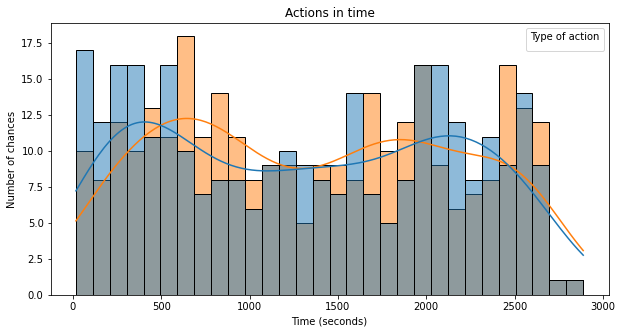

In [7]:
# Chances in time
plt.figure(figsize=(10, 5))
sns.histplot(df, x="time_seconds", hue="label", bins=30, kde=True)
plt.xlabel("Time (seconds)")
plt.ylabel("Number of chances")
plt.title("Actions in time")
plt.legend(title="Type of action")
plt.show()

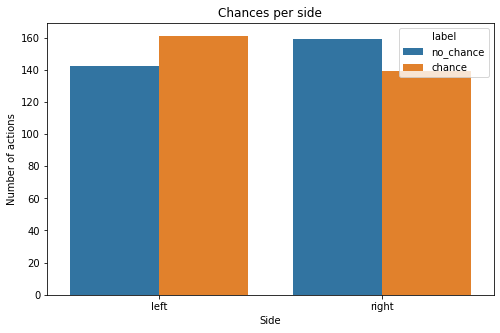

In [8]:
# Chances per side
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="side", hue="label")
plt.xlabel("Side")
plt.ylabel("Number of actions")
plt.title("Chances per side")
plt.show()

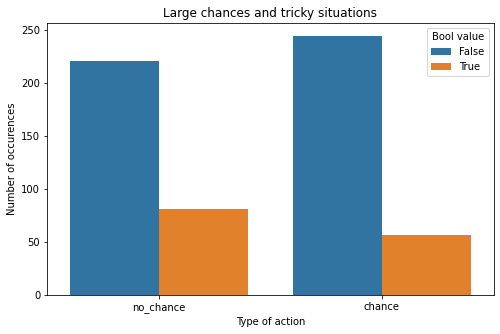

In [9]:
# Bool true vs false
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="label", hue="bool")
plt.xlabel("Type of action")
plt.ylabel("Number of occurences")
plt.title("Large chances and tricky situations")
plt.legend(title="Bool value", labels=["False", "True"])
plt.show()